In [ ]:
!pip install pandas numpy matplotlib seaborn plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
uploaded = files.upload()



Saving fear_greed_index.csv to fear_greed_index (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving historical_data.csv to historical_data (1).csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

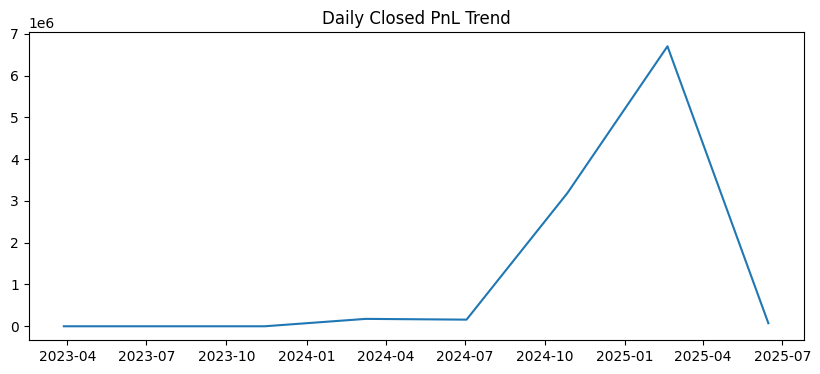

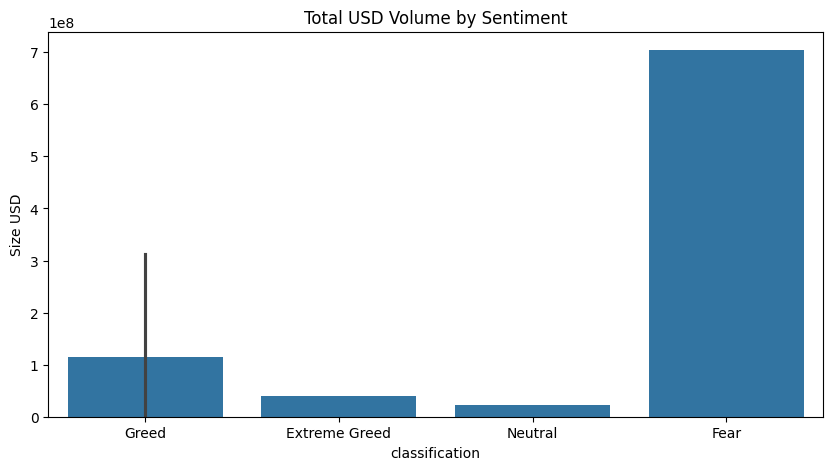

In [ ]:
fear = pd.read_csv('fear_greed_index.csv')
hist = pd.read_csv('historical_data.csv')
fear.head(), fear.info()
hist.head(), hist.info()
fear['date'] = pd.to_datetime(fear['date'])
hist['Timestamp'] = pd.to_datetime(hist['Timestamp'], unit='ms')
hist['date'] = hist['Timestamp'].dt.date
hist['date'] = pd.to_datetime(hist['date'])
hist.rename(columns={'Closed PnL':'closed_pnl'}, inplace=True)
hist.columns.tolist()
daily = hist.groupby('date').agg({
    'Size Tokens':'sum',
    'Size USD':'sum',
    'closed_pnl':'sum',
    'Execution Price':'mean',
    'Fee':'sum'
}).reset_index()

daily.head()
side_daily = hist.groupby(['date','Side']).agg({
    'Size USD':'sum',
    'closed_pnl':'sum'
}).reset_index()

side_daily.head()
fear['date'] = pd.to_datetime(fear['date'])
daily['date'] = pd.to_datetime(daily['date'])

merged = daily.merge(fear[['date','classification','value']], on='date', how='left')
merged.head()

plt.figure(figsize=(10,4))
plt.plot(merged['date'], merged['closed_pnl'])
plt.title("Daily Closed PnL Trend")
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(data=merged, x='classification', y='Size USD', estimator=sum)
plt.title("Total USD Volume by Sentiment")
plt.show()

In [ ]:
import os
os.makedirs("outputs", exist_ok=True)

In [ ]:
plt.savefig("outputs/volume_by_sentiment.png")

<Figure size 640x480 with 0 Axes>

In [ ]:
os.makedirs("csv_files", exist_ok=True)
merged.to_csv("csv_files/merged_dataset.csv", index=False)
daily.to_csv("csv_files/daily_metrics.csv", index=False)
